In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import scipy.stats 

%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Global minimum found considering the initial guess (x,y) =  [0, -1]  is: 
 (0.090 , -0.713)
Tha value that the function assumes at this point is: -1.032.
Global minimum found considering the initial guess (x,y) =  [0, 1]  is: 
 (-0.090 , 0.713)
Tha value that the function assumes at this point is: -1.032.


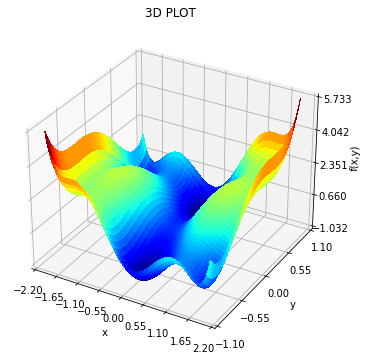

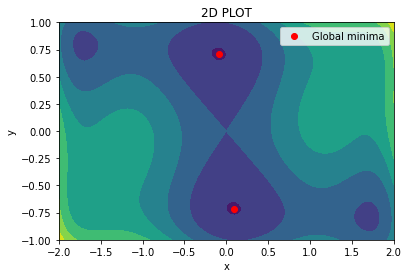

In [38]:
#exercise n.1

def f(x):
    return (4-2.1*pow(x[0],2)+pow(x[0],4)/3)*pow(x[0],2)+x[0]*x[1]+(4*pow(x[1],2)-4)*pow(x[1],2)

x=np.linspace(-2, 2, 10000)
y=np.linspace(-1, 1, 10000)
X, Y=np.meshgrid(x,y)
Z=f([X, Y])

fig=plt.figure(figsize=(9, 6))
ax=fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=False)
ax.xaxis.set_major_locator(LinearLocator(9))
ax.yaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_locator(LinearLocator(5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('3D PLOT')

fig1=plt.figure(figsize=(6, 4))
ax1=fig1.add_subplot()
ax1.contourf(x,y,Z)
#fig1.colorbar()
ax1.set_title('2D PLOT')
ax1.set_xlabel('x')
ax1.set_ylabel('y')


#from the 2d plot one can guess that there are 2 global minima. The result provided by the algorithm will depend
#on the initial guess for the minimum position therefore 2 opposite guesses are considered.
#x0->initial guess
x0=[0,-1]
res1=optimize.minimize(f, x0,method='L-BFGS-B', tol=1e-20)
print('Global minimum found considering the initial guess (x,y) = ',  x0,' is: \n (%1.3f , %1.3f)' %(res1.x[0],res1.x[1]))
print('Tha value that the function assumes at this point is: %1.3f.' %f([res1.x[0],res1.x[1]]))


x0=[0,1]
res2=optimize.minimize(f, x0,method='L-BFGS-B', tol=1e-20)
print('Global minimum found considering the initial guess (x,y) = ',  x0,' is: \n (%1.3f , %1.3f)' %(res2.x[0],res2.x[1]))
print('Tha value that the function assumes at this point is: %1.3f.' %f([res2.x[0],res2.x[1]]))
    
ax1.plot(res1.x[0], res1.x[1],'o',label='Global minima', color='red')
ax1.plot(res2.x[0], res2.x[1],'o',label='_nolegend_', color='red')
ax1.legend();

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

The function considered to fit both the datasets is f(x) = y0 + a*cos(b*x + x0).

Evaluating the f(x) fit applied to maximal temperatures, the fit parameters obtained are:
a = 10.58 ± 0.41 °C
b = 0.59 ± 0.02 1/months
x0 = 8.58 ± 0.15
y0 = 27.95 ± 0.43 °C

Evaluating the f(x) fit applied to maximal temperatures, the fit parameters obtained are:
a = 25.15 ± 1.31 °C
b = 0.60 ± 0.02 1/months
x0 = 8.28 ± 0.16
y0 = -36.71 ± 1.19 °C

The R coefficient of the maximal temperatures fit is R=0.99.
The p-value (Χ^2 test) associated to the maximal temperatures fit is p-value=0.375.

The R coefficient of the minimal temperatures fit is R=0.99.
The p-value (Χ^2 test) associated to the minimal temperatures fit is p-value=0.000000000000002.

The differece between the time offsets of maximal and minimal temperatures is 0.410.


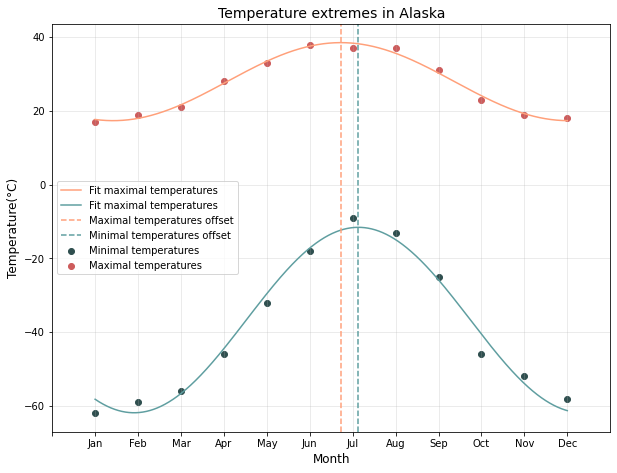

In [5]:
#exercise n.2

list_max=[17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
list_min=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
min_t=np.asarray(list_min)
max_t=np.asarray(list_max)
months=np.arange(1, 13)

names=['','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
xi = list(range(len(names)))

fig, ax = plt.subplots(figsize=(10, 7.5))
ax.scatter(months, min_t, color='darkslategray', label='Minimal temperatures')
ax.scatter(months, max_t, color='indianred', label='Maximal temperatures')
ax.set_xlim(0, 13)
ax.xaxis.set_major_locator(LinearLocator(14))
plt.xticks(xi, names)
ax.set_title('Temperature extremes in Alaska',  fontsize=14)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Temperature(°C)', fontsize=12)
ax.grid(alpha=0.3)

#Periodic fit to describe the data
def f(x, a, b, x0, y0):
    return y0+a*np.cos(b*x + x0)
print('The function considered to fit both the datasets is f(x) = y0 + a*cos(b*x + x0).')



#MAXIMAL TEMPERATURES FIT
opt1,cov1=optimize.curve_fit(f, months, max_t, p0=[10, 1, 6, 20])
x_new=np.linspace(1, 12, 5000)
ax.plot(x_new, f(x_new, *opt1), label='Fit maximal temperatures', color='lightsalmon')

#printing results
print('\nEvaluating the f(x) fit applied to maximal temperatures, the fit parameters obtained are:')
print('a = %1.2f ± %1.2f °C' %(opt1[0], np.sqrt(np.diag(cov1))[0]))
print('b = %1.2f ± %1.2f 1/months' %(opt1[1], np.sqrt(np.diag(cov1))[1]))
print('x0 = %1.2f ± %1.2f' %(opt1[2], np.sqrt(np.diag(cov1))[2]))
print('y0 = %1.2f ± %1.2f °C' %(opt1[3], np.sqrt(np.diag(cov1))[3]))



#MINIMUM TEMPERATURES FIT
opt2,cov2=optimize.curve_fit(f, months, min_t, p0=[25, 1, 6, -40])
ax.plot(x_new, f(x_new, *opt2), label='Fit maximal temperatures', color='cadetblue')

#printing results
print('\nEvaluating the f(x) fit applied to maximal temperatures, the fit parameters obtained are:')
print('a = %1.2f ± %1.2f °C' %(opt2[0], np.sqrt(np.diag(cov2))[0]))
print('b = %1.2f ± %1.2f 1/months' %(opt2[1], np.sqrt(np.diag(cov2))[1]))
print('x0 = %1.2f ± %1.2f' %(opt2[2], np.sqrt(np.diag(cov2))[2]))
print('y0 = %1.2f ± %1.2f °C' %(opt2[3], np.sqrt(np.diag(cov2))[3]))



#EVALUATING FIT GOODNESS 

#assuming an uncertainty of 1°C (1°->resolution)
error=np.full((1, len(months)), 1)

#Maximal T fit
SSR1=np.sum((max_t - f(months, *opt1))**2)
TSS1=np.sum((np.mean(max_t)-max_t)**2)
RSQ1=1-SSR1/TSS1
print('\nThe R coefficient of the maximal temperatures fit is R=%1.2f.' % np.sqrt(RSQ1))

ndof=len(months)-4 #4->number of fit parameters
chi2_1=np.sum(((max_t-f(months, *opt1))**2) / error**2)
pvalue1=1.-scipy.stats.chi2.cdf(chi2_1, ndof)
print('The p-value (Χ^2 test) associated to the maximal temperatures fit is p-value=%1.3f.' % pvalue1)


#Minimal T fit
SSR2=np.sum((min_t - f(months, *opt2))**2)
TSS2=np.sum((np.mean(min_t)-min_t)**2)
RSQ2=1-SSR2/TSS2
print('\nThe R coefficient of the minimal temperatures fit is R=%1.2f.' % np.sqrt(RSQ2))

chi2_2=np.sum(((min_t-f(months, *opt2))**2) / error**2)
pvalue2=1.-scipy.stats.chi2.cdf(chi2_2, ndof)
print('The p-value (Χ^2 test) associated to the minimal temperatures fit is p-value=%1.15f.' % pvalue2)

#While the R coefficient suggests that both the fit applied are satisfactory, the Χ^2 test results reveal that only
#the fit on the maximal temperatures is adequate (and pretty satisfying). The periodic function considered is not 
#instead an appropriate choice for the minimal temperatures; in this case the oscillation might not follow a sinusoidal
#trend, in fact winter data seem to remain almost constant.


#COMPARING TIME OFFSETS 
maximum_tmax=scipy.optimize.minimize_scalar(lambda x: -f(x, *opt1), bounds=[1,13], method='bounded')
toffset_max=maximum_tmax.x.copy() #maximal T time offset
maximum_tmin=scipy.optimize.minimize_scalar(lambda x: -f(x, *opt2), bounds=[1,13], method='bounded')
toffset_min=maximum_tmin.x.copy() #minimal T time offset

ax.axvline(x=toffset_max, color='lightsalmon', linestyle='--', label='Maximal temperatures offset')
ax.axvline(x=toffset_min, color='cadetblue', linestyle='--', label='Minimal temperatures offset')

diff=np.abs(toffset_max-toffset_min)
print('\nThe differece between the time offsets of maximal and minimal temperatures is %1.3f.' %diff)
#The 2 time offests don't seem to be reasonably compatible when compared to fit accuracy.

ax.legend(loc='best');

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

The function considered f(x) = m*x + q + a*exp((-(x-x0)**2)/(2*σ**2)).

Evaluating the fit applied, the fit parameters obtained are:
a = 2048.94 ± 37.19 
σ = 0.22 ± 0.00 
x0 = -0.09 ± 0.00
m = -13.11 ± 8.17 
q = 63.04 ± 11.13 

The R coefficient of the maximal temperatures fit is R=1.0.
The fit applied is unsatisfactory (p-value < 5%).
Chi^2 reduced is: 28.91 (>>1).


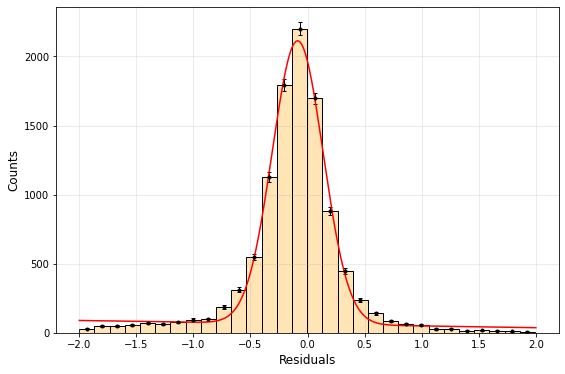

In [4]:
#exercise n.3

#opening pickle file and creating a DataFrame
import pickle
infile=open('data/residuals_261.pkl', 'rb')
new_dict=pickle.load(infile)
infile.close()

dictionary=dict(new_dict.item())
df=pd.DataFrame(dictionary)

df=df[abs(df['residuals'])<2.]#only |residuals|<2 considered
histo=df.loc[:,'residuals']

fig=plt.figure(figsize=(9,6))
ax0=plt.subplot()
ax0.grid(alpha=0.3)
h, bins, _=ax0.hist(histo, bins=30, color='moccasin', edgecolor='black', density=False, cumulative=False)
ax0.set_xlabel('Residuals', fontsize=12)
ax0.set_ylabel('Counts', fontsize=12)

bincenters=(bins[1:]+bins[:-1])/2
sigma=np.sqrt(h)
ax0.errorbar(bincenters, h, yerr=sigma, fmt='.k', elinewidth=1 ,capsize=2)


#FIT
def f(x, a, sigma, x0, m, q):  #considering gaussian + line to fit 
    return m*x+q+a*np.exp(-pow(x-x0,2)/(2*pow(sigma,2)))
print('The function considered f(x) = m*x + q + a*exp((-(x-x0)**2)/(2*σ**2)).')

opt,cov=optimize.curve_fit(f, bincenters, h, p0=[max(h), 0.2, 0, 0, 10])
x_new=np.linspace(-2., 2., 5000)
ax0.plot(x_new, f(x_new, *opt), label='Fit', color='red')
print('\nEvaluating the fit applied, the fit parameters obtained are:')
print('a = %1.2f ± %1.2f ' %(opt[0], np.sqrt(np.diag(cov))[0]))
print('σ = %1.2f ± %1.2f ' %(opt[1], np.sqrt(np.diag(cov))[1]))
print('x0 = %1.2f ± %1.2f' %(opt[2], np.sqrt(np.diag(cov))[2]))
print('m = %1.2f ± %1.2f ' %(opt[3], np.sqrt(np.diag(cov))[3]))
print('q = %1.2f ± %1.2f ' %(opt[4], np.sqrt(np.diag(cov))[4]))



#EVALUATING FIT GOODNESS 

SSR=np.sum((h - f(bincenters, *opt))**2)
TSS=np.sum((np.mean(h)-h)**2)
RSQ=1-SSR/TSS
print('\nThe R coefficient of the maximal temperatures fit is R=%1.1f.' % np.sqrt(RSQ))

ndof=len(bincenters)-5 #5->number of fit parameters
chi2=np.sum(((h-f(bincenters, *opt))**2) / sigma**2)
pvalue = 1.-scipy.stats.chi2.cdf(chi2, ndof)
if pvalue>=0.5:
    print('The fit applied is satisfactory (p-value=', pvalue, ')')
else:
    print('The fit applied is unsatisfactory (p-value < 5%).')
print('Chi^2 reduced is: %1.2f (>>1).' %( chi2/ndof) )
    
#Even though the R coefficient describes a satisfying fit, the X^2 test applied reveals that the gaussian+line fit 
#doesn't describe sufficientely the data. 

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [ ]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

Evaluating f(t), the fit parameters obtained are (range=[2008-2012]):
a = -9.96 ± 0.13 °C
b = 12.33 ± 0.01
c = 9.26 ± 0.09 °C
Overall average temperature in Munich (range=[2008-2012]) is: 9.26 °C.
Typical daily average values predicted by the model for coldest and hottest time of the year are respectively
 -0.70 °C and  19.22 °C.


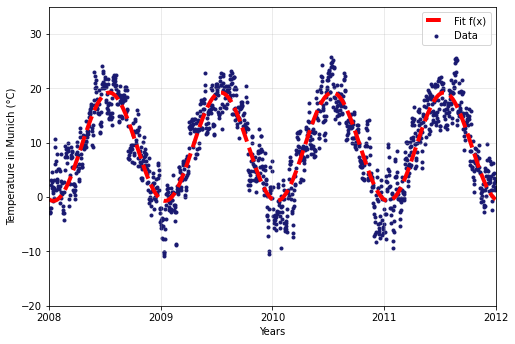

In [6]:
#exercise n.4

from scipy.stats import f as fish

def f(t,a,b,c):
    return a*np.cos(2*np.pi*t+b)+c

data=np.loadtxt('data/munich_temperatures_average_with_bad_data.txt')
year, temperature = data.T

#removing outliers, i.e. 100°C and -100°C rows
mask_up=(temperature<99)
temperature, year=temperature[mask_up], year[mask_up]
mask_down=(temperature>-99)
temperature, year=temperature[mask_down], year[mask_down]

#Only considering range [2008-2012]
mask_2008=(year>=2008)
temperature, year=temperature[mask_2008], year[mask_2008]
mask_2012=(year<=2012)
temperature, year=temperature[mask_2012], year[mask_2012]


fig, ax=plt.subplots(figsize=(8, 5.5))
ax.scatter(year, temperature, label='Data', color='midnightblue', marker='.')
ax.xaxis.set_major_locator(LinearLocator(5)) #printing only integer years
ax.set_xlabel('Years')
ax.set_ylabel('Temperature in Munich (°C)')
ax.set_xlim(2008,2012)
ax.set_ylim(-20,+35)
ax.grid(alpha=0.3)

#FIT F(X)
opt,cov=optimize.curve_fit(f, year, temperature)
x_new=np.linspace(2008, 2012, 5000)
ax.plot(x_new, f(x_new, *opt), label='Fit f(x)', color='red', linewidth=4, linestyle='dashed')
ax.legend(loc='best')

print('Evaluating f(t), the fit parameters obtained are (range=[2008-2012]):')
print('a = %1.2f ± %1.2f °C' %(opt[0], np.sqrt(np.diag(cov))[0]))
print('b = %1.2f ± %1.2f' %(opt[1], np.sqrt(np.diag(cov))[1]))
print('c = %1.2f ± %1.2f °C' %(opt[2], np.sqrt(np.diag(cov))[2]))

mean_temperature=np.mean(temperature)
print('Overall average temperature in Munich (range=[2008-2012]) is: %1.2f °C.' %(mean_temperature))

print('Typical daily average values predicted by the model for coldest and hottest time of the year are respectively')
print(' %1.2f °C and  %1.2f °C.' %(f(x_new, *opt).min(), f(x_new, *opt).max()))

#Parameter b represents a possibile shift in time for the hottest/coldest days: cosine function would predict
#the hottest days on January (x=0) and the coldest days on June (~Δx= π/2) and the fit tells me that these 
#expectations are correct (shift is b~12, i.e. the function is periodic with a 1 year period)



Evaluating g(t), the fit parameters obtained are (range=[2008-2012]):
a = -9.96 ± 0.13 °C
b = 1.00 ± 0.00 1/years
c = 8.62 ± 23.79 
d = 9.27 ± 0.10 °C



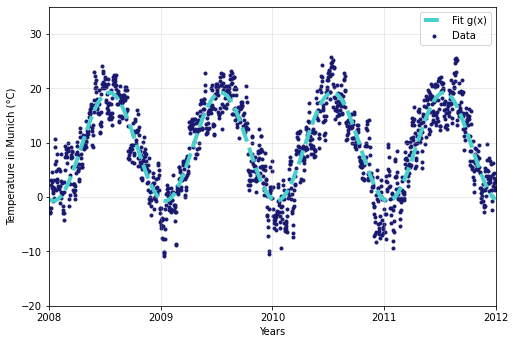

In [4]:
def g(t,a,b,c,d):
    return a*np.cos(2*np.pi*t*b+c)+d

#FIT G(X)
fig1, ax1=plt.subplots(figsize=(8, 5.5))
ax1.scatter(year, temperature, label='Data', color='midnightblue', marker='.')
ax1.xaxis.set_major_locator(LinearLocator(5)) #printing only integer years
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature in Munich (°C)')
ax1.set_xlim(2008,2012)
ax1.set_ylim(-20,+35)
ax1.grid(alpha=0.3)

opt_g,cov_g=optimize.curve_fit(g, year, temperature)
ax1.plot(x_new, g(x_new, *opt_g), label='Fit g(x)', color='mediumturquoise', linewidth=4, linestyle='dashed')
ax1.legend(loc='best')
print('\nEvaluating g(t), the fit parameters obtained are (range=[2008-2012]):')
print('a = %1.2f ± %1.2f °C' %(opt_g[0], np.sqrt(np.diag(cov_g))[0]))
print('b = %1.2f ± %1.2f 1/years' %(opt_g[1], np.sqrt(np.diag(cov_g))[1]))
print('c = %1.2f ± %1.2f ' %(opt_g[2], np.sqrt(np.diag(cov_g))[2]))
print('d = %1.2f ± %1.2f °C\n' %(opt_g[3], np.sqrt(np.diag(cov_g))[3]))

In [5]:
RSS_f=np.sum((f(year,*opt)-temperature)**2)
RSS_g=np.sum((g(year,*opt_g)-temperature)**2)
print('RSS for f(t) and g(t) are: RSS(f)=%1.2f, RSS(g)=%1.2f.' %(RSS_f, RSS_g))

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F=((ssr_1-ssr_2)/(ndof_2-ndof_1))/(ssr_2/(nbins-ndof_2))
    CL=1.-fish.cdf(F, ndof_2-ndof_1, nbins-ndof_2)
    if verbose: print('CL: %.3f' % CL, ', additional parameter necessary:', 'YES.' if CL < 0.10 else 'NO.')
    return CL

print('\nFisher F-test:')
Ftest(RSS_f,RSS_g,3,4,len(year),True);

RSS for f(t) and g(t) are: RSS(f)=18669.52, RSS(g)=18669.23.

Fisher F-test:
CL: 0.881 , additional parameter necessary: NO.
